In [53]:
# -*- coding: utf-8 -*-
"""
Created on Fri May  6 15:14:16 2022

@author: zhuch
"""

# -*- coding: utf-8 -*-
"""
Created on Thu May  5 17:30:53 2022

@author: zhuch
"""

import pickle

import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import torch.nn.functional as F
import h5py
#%%

# with open("speckle.dat", 'rb') as f:
#     input_list = pickle.load(f)

# with open("SLM.dat", 'rb') as f:
#     output_list =pickle.load(f)
    
#%%

# with open("data/experiment results/Speckle_20x_200um_Round_Scale-2.5x_Natural_M_2_10238_112x112.dat", 'rb') as f:
#     input_list = pickle.load(f)

# with open("data/experiment results/Natural_10238.dat", 'rb') as f:
#     output_list =pickle.load(f)
    
#%%

with open("data/experiment results/Speckle_20x_400um_Round_Scale-2x_Natural_Order_M_1_112x112_10238.dat", 'rb') as f:
    input_list = pickle.load(f)

with open("data/experiment results/Natural_Order_10238.dat", 'rb') as f:
    output_list =pickle.load(f)


#%%
# pathname = "data/natcom/Data_1m.h5"
    

# hf = h5py.File(pathname, 'r')
# name1 = 'Training/Original_images/ImageNet'
# name2 = 'Training/Speckle_images/ImageNet'

# output_list = hf[name1]
# input_list = hf[name2]

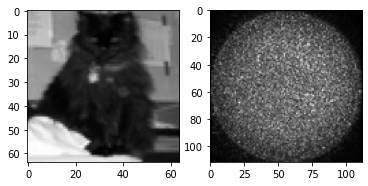

In [12]:
#%%
import matplotlib.pyplot as plt

idx = np.random.randint(0,5000)
# idx = 2600

plt.figure()
plt.subplot(121)
plt.imshow(output_list[idx], cmap = 'gray')
plt.subplot(122)
plt.imshow(input_list[idx].reshape(112,112), cmap = 'gray')
plt.show()

In [8]:
np.shape(output_list)

(10238, 64, 64, 1)

In [54]:

#%%
# s = input_list[5]
# x = np.arange(0,112,1)
# y = np.arange(0,112,1)
# X,Y = np.meshgrid(x,y)
# plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter(X,Y,s.reshape(112,112), cmap='viridis')
# # plt.colorbar()
# plt.show()

#%%
N_sample = 500
start_id = 0
train_rate = 0.9
train_set_number = int(train_rate*N_sample)

input_dim = (112,112)
output_dim = (64,64)

input_H = np.array(input_list).reshape(-1,1, *input_dim)
label = np.array(output_list).reshape(-1,1, *output_dim)

train_number = np.arange(start_id,start_id + N_sample, dtype ='int')
np.random.shuffle(train_number)

x_train = input_H[train_number[0:train_set_number]]
x_test = input_H[train_number[train_set_number:N_sample]]

y_train =label[train_number[0:train_set_number]]
y_test = label[train_number[train_set_number:N_sample]]

x_train = torch.FloatTensor(x_train*2*np.pi/255.0)
x_test = torch.FloatTensor(x_test*2*np.pi/255.0)

# x_train = torch.sqrt(x_train)
# x_test = torch.sqrt(x_test)

y_train = torch.FloatTensor(y_train/255.0)
y_test = torch.FloatTensor(y_test/255.0)
    
    

#%%
del input_list
del output_list
del input_H
del label
#%%
torch.cuda.empty_cache()


In [55]:
batch_size = 100

# create data loaders
train_dataloader = DataLoader(list(zip(x_train, y_train)), batch_size = batch_size )
test_dataloader = DataLoader(list(zip(x_test,y_test)),  batch_size = batch_size )


In [15]:
# import math

# class complexLayer(nn.Module):
#     """ Custom Linear layer but mimics a standard linear layer """
#     def __init__(self, size_in, size_out):
#         super().__init__()
#         self.size_in, self.size_out = size_in, size_out
#         weights1 = torch.Tensor(size_out, size_in)
#         self.weights1 = nn.Parameter(weights1)  # nn.Parameter is a Tensor that's a module parameter.
#         weights2 = torch.Tensor(size_out, size_in)
#         self.weights2 = nn.Parameter(weights2)

#         # initialize weights and biases
#         nn.init.kaiming_uniform_(self.weights1, a=math.sqrt(5)) # weight init
#         nn.init.kaiming_uniform_(self.weights2, a=math.sqrt(5)) # weight init


#     def forward(self, x):
#         x1 = torch.mm(x,self.weights1.t())
# #         x1 = torch.square(torch.mm(torch.cos(x),self.weights1.t()))
# #         x2 = torch.square(torch.mm(torch.sin(x),self.weights2.t()))
# #         x =  torch.add(x1,x2)
#         return x1

# #%%

# device = "cuda"
# import torch.nn.functional as F

# # Define model
# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super(NeuralNetwork, self).__init__()
#         self.my1 = complexLayer(112*112, 64*64)
#         self.flatten = nn.Flatten()

#     def forward(self, x):
#         x = self.flatten(x)
#         x = self.my1(x)
#         x = x.view(-1, 1, 64, 64)
#         return x

# model = NeuralNetwork().to(device)    


I = np.square(abs( T* Input_image))

I = T' * Input_image

Input_image: 64x64
I: 112x112 
T: 4096x (112x112)



In [71]:
# Define model
Nnodes = 2048
device = 'cuda'
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(112*112, 64*64)
        self.flatten = nn.Flatten()
        
    def forward(self, x):
        x3 = self.flatten(x)
        x4 = self.fc1(x3)
        x5 = x4.view(-1,1,64,64)
        return x5

model = NeuralNetwork().to(device)
from torchsummary import summary
summary(model, (1, 112, 112))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                [-1, 12544]               0
            Linear-2                 [-1, 4096]      51,384,320
Total params: 51,384,320
Trainable params: 51,384,320
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.13
Params size (MB): 196.02
Estimated Total Size (MB): 196.19
----------------------------------------------------------------


In [39]:
!pip install torchsummary

  Using cached torchsummary-1.5.1-py3-none-any.whl (2.8 kB)


In [72]:

#%%
import ssim
loss_fn = ssim.SSIM()

from torch.optim.lr_scheduler import ReduceLROnPlateau
# loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# optimizer = Nadam(model.parameters(), lr=1e-3)
scheduler = ReduceLROnPlateau(optimizer)


def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"Train loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return loss
#     return loss.cpu().detach().numpy()       
            
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
    test_loss /= num_batches
    print(f"Test Loss:  {test_loss:>8f} \n")
    return test_loss
    
    

In [73]:
#%%  Neural network training


epochs = 200

Loss_train = []
Loss_test = []
steps = []


best_loss = 1.0


for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train(train_dataloader, model, loss_fn, optimizer)
    test_loss = test(test_dataloader, model, loss_fn)
    Loss_train.append(train_loss)
    Loss_test.append(test_loss)
    if test_loss<best_loss:
        best_loss = test_loss
    steps.append(t)
    scheduler.step(test_loss)
print("Done!")    
    

Epoch 1
-------------------------------
Train loss: 1.000268  [    0/  450]
Test Loss:  0.999975 

Epoch 2
-------------------------------
Train loss: 0.999967  [    0/  450]
Test Loss:  0.999986 

Epoch 3
-------------------------------
Train loss: 0.999981  [    0/  450]
Test Loss:  0.999989 

Epoch 4
-------------------------------
Train loss: 0.999985  [    0/  450]
Test Loss:  0.999990 

Epoch 5
-------------------------------
Train loss: 0.999987  [    0/  450]
Test Loss:  0.999990 

Epoch 6
-------------------------------
Train loss: 0.999987  [    0/  450]
Test Loss:  0.999990 

Epoch 7
-------------------------------
Train loss: 0.999987  [    0/  450]
Test Loss:  0.999990 

Epoch 8
-------------------------------
Train loss: 0.999986  [    0/  450]
Test Loss:  0.999989 

Epoch 9
-------------------------------
Train loss: 0.999986  [    0/  450]
Test Loss:  0.999988 

Epoch 10
-------------------------------
Train loss: 0.999985  [    0/  450]
Test Loss:  0.999987 

Epoch 11


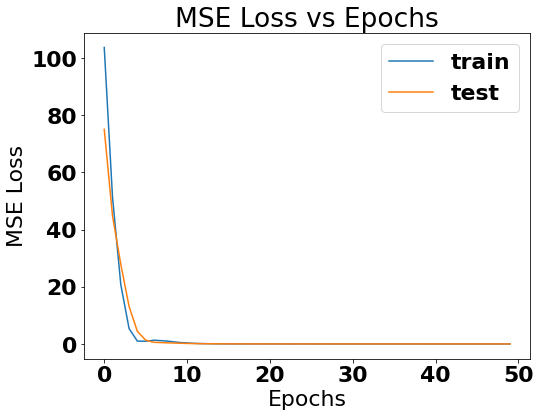

In [59]:

# %%
plt.figure(figsize = (8,6))
plt.title("MSE Loss vs Epochs")
plt.plot(steps, torch.FloatTensor(Loss_train).cpu(), label = 'train')
plt.plot(steps, Loss_test, label = 'test')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()
        
#%%
torch.cuda.empty_cache()
#%%


#%%
# figure configuration
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)


In [60]:
torch.save(model.state_dict(), 'model/exp_mlmodel5.dat')

#%%  test model

test_model = NeuralNetwork().to('cpu')
# test_model =UNet().to('cpu')

test_model.load_state_dict(torch.load('model/exp_mlmodel5.dat'))


<All keys matched successfully>

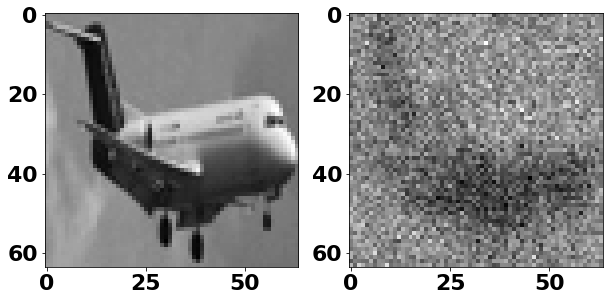

In [65]:
test_number = np.random.randint(0,50)

with torch.no_grad():
    test_model.eval()
    X= x_test[test_number].reshape(-1,1,*input_dim)
    pred = test_model(X)
plt.figure(figsize = (10,8)) 
plt.subplot(121)
plt.imshow(y_test[test_number].reshape(output_dim), cmap = 'gray')  
plt.subplot(122)
plt.imshow(pred[0].reshape(output_dim), cmap = 'gray')
# plt.imshow(pred[0].reshape(64,64))
plt.show()





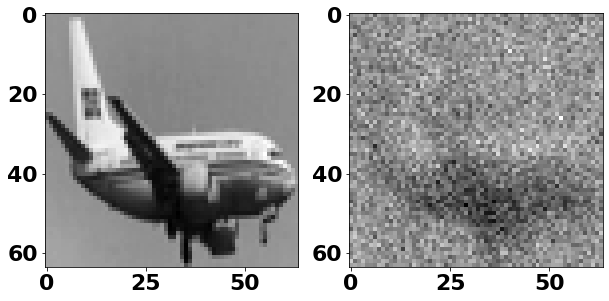

In [68]:
#%%
test_number = np.random.randint(0,90)

with torch.no_grad():
    test_model.eval()
    X= x_train[test_number].reshape(-1,1,*input_dim)
    pred = test_model(X)
plt.figure(figsize = (10,8)) 
plt.subplot(121)
plt.imshow(y_train[test_number].reshape(output_dim), cmap = 'gray')  
plt.subplot(122)
plt.imshow(pred[0].reshape(output_dim), cmap = 'gray')

plt.show()

#%%
# test_number = np.random.randint(0,500)

# with torch.no_grad():
#     test_model.eval()
#     X = x_train[test_number].reshape(-1,1, *input_dim)
#     pred = test_model(X)
  
# plt.figure() 

# plt.subplot(121)
# plt.imshow(y_train[test_number].reshape(64,64), cmap = 'gray')  
# plt.subplot(122)
# plt.imshow(pred[0].reshape(64,64), cmap = 'gray')
# plt.show()